# Matplotlib in Haskell

A quick tour of some of the features of Haskell Matplotlib. Lightweight bindings that give you access to all of Matplotlib through a simple API. With IHaskell integration, rendering is automatic. You can save to a file by just prepending `file "filename.png"`, to any command and to a screen with a viewer by prepending `onscreen`, and you can see the raw svg with `asSvg`. The [repo has far more examples](https://github.com/abarbu/matplotlib-haskell/).

In [1]:
:opt no-lint
{-# LANGUAGE ExtendedDefaultRules, ScopedTypeVariables, QuasiQuotes, ParallelListComp #-}

In [2]:
import Graphics.Matplotlib

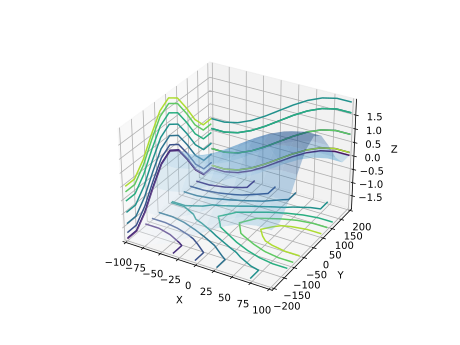

In [3]:
contourF (\a b -> sin (a*pi/180.0) + cos (b*pi/180.0)) (-100) 100 (-200) 200 10

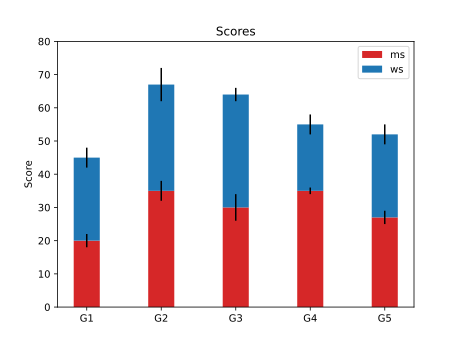

In [4]:
mstacked = bar [0..4] ms @@ [o1 width, o2 "color" "#d62728", o2 "yerr" mStd, o2 "label" "ms"]
  % bar [0..4] ws @@ [o1 width, o2 "bottom" ms,       o2 "yerr" wStd, o2 "label" "ws"]
  % xticks [0..4 :: Int]
  % xtickLabels "['G1', 'G2', 'G3', 'G4', 'G5']"
  % title "Scores"
  % ylabel "Score"
  % yticks [0,10..80 :: Int]
  % legend
  where ms    = [20 :: Double, 35, 30, 35, 27]
        ws    = [25 :: Double, 32, 34, 20, 25]
        mStd  = [2 :: Double, 3, 4, 1, 2]
        wStd  = [3 :: Double, 5, 2, 3, 3]
        width = 0.35 :: Double
mstacked

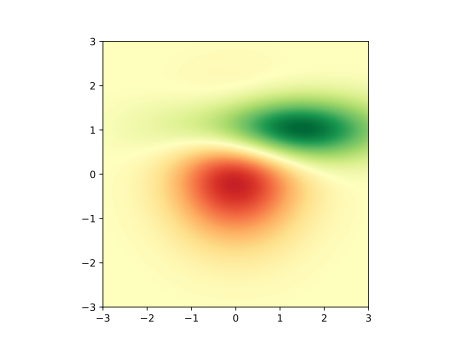

In [5]:
pdfBivariateNormal x y sigmax sigmay mux muy sigmaxy =
  1/(2*pi*sigmax*sigmay*(sqrt(1-rho^2)))*exp(-z/(2*(1-rho^2)))
  where rho = sigmaxy/(sigmax*sigmay)
        z = (x-mux)^2/sigmax^2-(2*rho*(x-mux)*(y-muy))/(sigmax*sigmay)+(y-muy)^2/sigmay^2

mbivariateNormal =
  imshow vs @@ [o2 "interpolation" "bilinear"
               ,o2 "cmap" $ raw "RdYlGn"
               ,o2 "origin" "lower"
               ,o2 "extent" [-3::Double, 3, -3, 3]
               ,o2 "vmin" $ (0-) $ maximum $ map abs vs'
               ,o2 "vmax" $ maximum $ map abs vs']
  where delta = 0.025::Double
        xs = [-3.0,-3.0+delta..3.0]
        ys = [-3.0,-3.0+delta..3.0]
        vs = [[pdfBivariateNormal x y 1.5 0.5 1.0 1.0 0.0
               - pdfBivariateNormal x y 1.0 1.0 0.0 0.0 0.0
              | x <- xs]
              | y <- ys]
        vs' = foldl (++) [] vs
mbivariateNormal

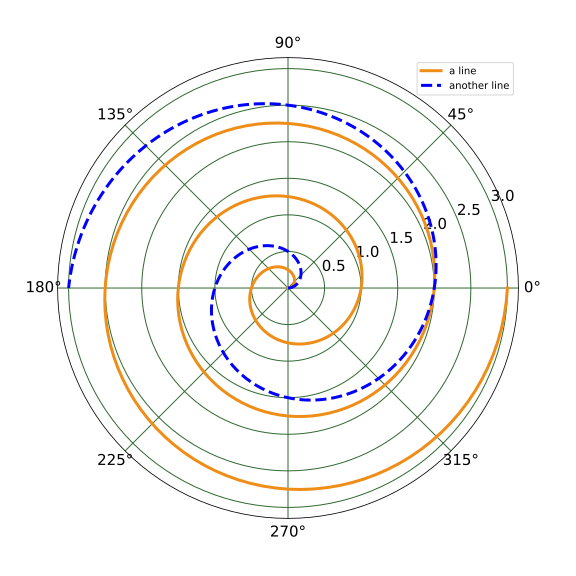

In [6]:
mpolar = rc "grid" @@ [o2 "color" "#316931", o2 "linewidth" 1, o2 "linestyle" "-"]
  % rc "xtick" @@ [o2 "labelsize" 15]
  % rc "ytick" @@ [o2 "labelsize" 15]
  % figure @@ [o2 "figsize" (8::Int,8::Int)]
  % addAxes @@ [o1 [0.1, 0.1, 0.8, 0.8::Double], o2 "projection" "polar"
               -- TODO My matplotlib doesn't seem to have this property
               -- , o2 "facecolor" "#d5de9c"
               ]
  % plot theta r @@ [o2 "color" "#ee8d18", o2 "lw" 3, o2 "label" "a line"]
  % plot (map (\x -> 0.5*x) theta) r
         @@ [o2 "color" "blue", o2 "ls" "--", o2 "lw" 3, o2 "label" "another line"]
  % legend
  where r = [0,0.01..3.0]
        theta = map (\x -> 2*pi*x) r
mpolar

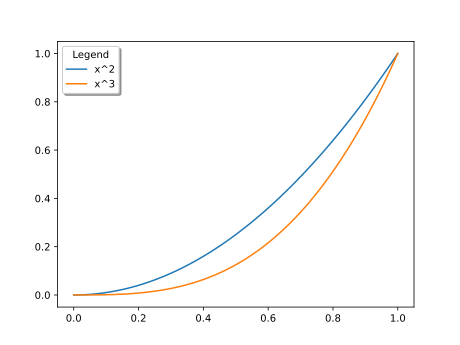

In [7]:
plotMapLinear (\x -> x ** 2) 0 1 100 @@ [o2 "label" "x^2"]
  % plotMapLinear (\x -> x ** 3) 0 1 100 @@ [o2 "label" "x^3"]
  % legend @@ [o2 "fancybox" True, o2 "shadow" True, o2 "title" "Legend", o2 "loc" "upper left"]

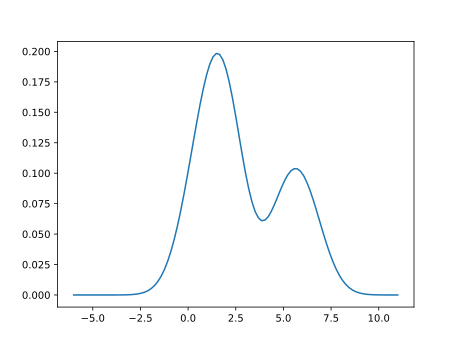

In [8]:
density [2.1, 1.3, 0.4, 1.9, 5.1, 6.2] (Just (-6, 11))


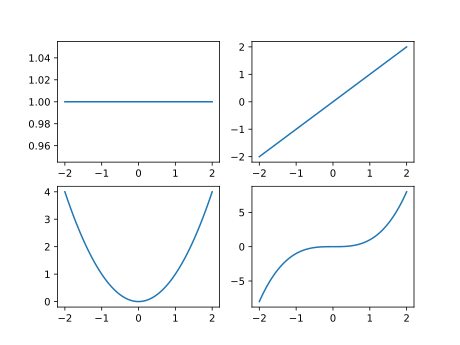

In [9]:
subplots @@ [o2 "nrows" 2, o2 "ncols" 2]
        % setSubplot 0 % plotMapLinear (**0) (-2) 2 100
        % setSubplot 1 % plotMapLinear (**1) (-2) 2 100
        % setSubplot 2 % plotMapLinear (**2) (-2) 2 100
        % setSubplot 3 % plotMapLinear (**3) (-2) 2 100

In [10]:
import System.Random
import Data.List
import Data.List.Split

uniforms :: (Random a, Num a) => [a]
uniforms = randoms (mkStdGen 42)

boxMuller :: Floating a => a -> a -> (a,a)
boxMuller u1 u2 = (r * cos t, r * sin t) where r = sqrt (-2 * log u1)
                                               t = 2 * pi * u2

boxMullers :: Floating a => [a] -> [a]
boxMullers (u1:u2:us) = n1:n2:boxMullers us where (n1,n2) = boxMuller u1 u2
boxMullers _          = []

normals = boxMullers $ randoms (mkStdGen 42)

xs = [-0.54571992,  1.48409716, -0.57545561,  2.13058156, -0.75740497,
      -1.27879086, -0.96008858, -1.65482373, -1.69086194, -1.41925464,
       0.68144401,  1.44847131,  1.12124327,  1.32056244, -0.4555279 ,
       1.96002923, -1.34810771,  0.01513306,  1.25298883, -1.07541677,
       0.60920278, -0.13978163,  0.3975209 , -0.15211044,  0.0534633 ,
      -0.39498474, -1.15320186,  0.6795936 ,  0.50704333,  1.52951037,
       0.90867393, -0.24833115,  1.39816295, -0.28642814,  0.96951915,
      -1.20438266, -0.32642955, -0.62982941,  0.7245042 , -1.03169685,
      -0.00542761,  0.54247125, -1.11559132, -2.6829048 , -0.13370841,
      -0.74111166,  0.59198725,  2.73711931,  1.82122485, -0.73915212,
       0.88290489, -1.17307876,  0.06753304,  0.40150672,  1.54455801,
      -0.31133243,  1.66844302, -0.1290924 ,  0.89657699,  0.41181393,
       2.13382656,  1.58577659, -1.02449069, -1.10245954, -0.59691196,
      -0.63040161, -0.51541836,  0.04139408,  0.54203055, -2.09082082,
      -0.41295376, -0.77509336,  0.47612065, -1.69680096,  0.90195265,
       0.23798858, -0.05112783,  1.00645056, -0.67012513,  0.52017487,
      -0.42251472,  0.96513844,  1.00298933,  0.18257527,  0.54599979,
      -1.50321042,  0.03949817,  0.35286613,  1.86994544,  1.16249707,
       0.57421291,  1.21151469,  1.74863421,  0.42287859, -1.22785845,
      -0.61650528,  1.76743253, -0.45818694, -1.16560907,  0.0677502 ]
ys = [ 1.28231455,  1.13480471,  0.57738712,  0.10268954,  1.00162163,
      -0.85453571, -1.61049343,  1.33194242,  0.12054943, -0.56568776,
       2.11550009,  0.03663454,  0.24889313,  0.85458325,  0.77326592,
       0.58815223, -0.79997005,  0.54979418,  0.47711544,  0.73004143,
      -0.65704545,  1.1946521 , -0.31119444, -0.0958055 ,  0.37838453,
       1.01281301, -0.53364162,  2.84609607,  0.09363483, -0.14821451,
      -0.0481863 , -3.58277731, -1.7168244 , -0.87526525, -0.65430073,
       1.0284506 , -0.81397895,  0.34868379, -0.51671293,  0.92879285,
       0.04099886,  1.0828335 ,  1.25991492, -1.48901447,  0.43657503,
       0.78191509,  0.16633587,  1.99411663, -0.25542794, -0.43377353,
      -0.82871869, -0.0402321 , -0.06278027,  0.28066445,  0.01185443,
       1.42640101, -0.16627931,  0.82021257, -0.66684095, -0.21289723,
      -1.25974667, -0.28681327, -2.11039334, -0.2722768 , -0.51622958,
       0.01324637, -0.29277708,  1.35916036, -0.09089638, -1.00619256,
       0.62707331,  1.17105748, -0.85636353, -0.6243519 ,  0.1720141 ,
      -0.15715394,  1.13488465,  2.43996937,  2.08224839, -0.23676918,
      -0.24924999,  1.21629376, -0.12748227,  0.78319565, -0.10528614,
       0.60177749, -1.03490762, -0.59163218,  0.16414076,  2.22783012,
      -0.55178235, -0.69915414,  1.35454045,  0.42931902, -1.33656935,
      -0.8023867 , -2.81354854,  0.39553427, -0.22235586, -1.34302011]

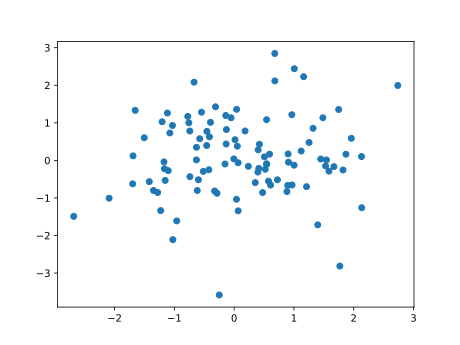

In [11]:
scatter xs ys

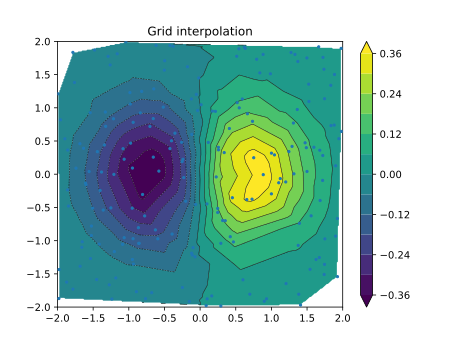

In [12]:
mgriddata = readData (x, y, z, xi, yi)
  -- TODO This requires a lot of manual indexing. Next big API change will be to
  -- have references to loaded data.
  % mp # "data.append(interpolate.griddata((data[0], data[1]), data[2], tuple(np.meshgrid(data[3], data[4])), method='linear', rescale=True))"
  % mp # "plot.contour(data[3], data[4], data[5], 15, linewidths=0.5, colors='k')"
  % mp # "plot.contourf(data[3], data[4], data[5], 15, extend='both')"
  % colorbar
  % scatter x y @@ [o2 "marker" "o", o2 "s" 5, o2 "zorder" 10]
  % xlim (-2) 2
  % ylim (-2) 2
  % title "Grid interpolation"
  where [x, y] = take 2 $ chunksOf 200 $ map (\x -> 4 * (x - 0.5)) $ uniforms
        z = zipWith (\x y -> x*(exp $ -(x**2) - y**2)) x y
        xi = mapLinear (\x -> x) (-2.1) 2.1 300
        yi = mapLinear (\x -> x) (-2.1) 2.1 300

mgriddata

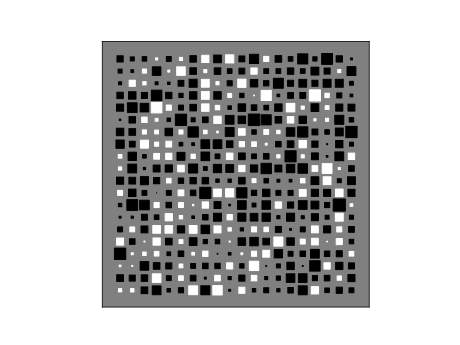

In [13]:
mhinton = mp # "ax.patch.set_facecolor('gray')"
  % setAspect @@ [o1 "equal", o1 "box"]
  % mp # "ax.xaxis.set_major_locator(plot.NullLocator())"
  % mp # "ax.yaxis.set_major_locator(plot.NullLocator())"
  % foldl (\a (x,y,w) -> a % f x y w) mp m
  % mp # "ax.autoscale_view()"
  % mp # "ax.invert_yaxis()"
  where m = [ (x,y,w) | x <- [0..19], y <- [0..19] | w <- (map (\x -> x - 0.5) normals) ]
        maxWeight = maximum $ map (\(_,_,v) -> abs v) m
        f x y w = mp # "ax.add_patch(plot.Rectangle("
                     # "[" # (x - size / 2) # "," # (y - size / 2) # "]"
                     # ", " # size # ", " # size
                     # ", facecolor='" # color # "', edgecolor='" # color # "'))"
          where color = if w > 0 then "white" else "black"
                size  = sqrt $ abs w / maxWeight
mhinton